**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import KDTree
import sklearn.metrics
import seaborn as sns
from sklearn import datasets
from functools import reduce
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.alg = algorithm

    def setneigh(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        if self.alg != "kd_tree":
            self.ar = np.copy(X)
            self.ar.astype(np.float64)
        else:
            self.tree = KDTree(X, metric='euclidean')
        self.an = np.copy(y)
        self.m = max(y)
        self.an.astype(np.uint8)

    def algr(self, X):
        if self.alg != "kd_tree":
            dist = sklearn.metrics.pairwise_distances(X, self.ar)
            n = np.argpartition(dist, self.n_neighbors)
        else:
            n = self.tree.query(X, self.n_neighbors, return_distance=False)
        self.tblnrcl = self.an[n]

    def predict(self, X):
        self.algr(X)
        self.res = np.zeros(X.shape[0])
        for j in range(self.tblnrcl.shape[0]):
            t = Counter(self.tblnrcl[j][:self.n_neighbors])
            self.res[j] = t.most_common(1)[0][0]
        return self.res

    def predict_proba(self, X):
        prob = np.zeros((X.shape[0], int(self.m+1)))
        self.algr(X)
        for j in range(self.tblnrcl.shape[0]):
            for i in range(int(self.m+1)):
                prob[j][i] = Counter(self.tblnrcl[j][:self.n_neighbors])[i]
        print(prob/self.n_neighbors)

    def score(self, X, y):
        tra = 0
        self.predict(X)
        for i in range(y.shape[0]):
            tra += y[i] == self.res[i]
        return tra/X.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=17)
my_clf = MyKNeighborsClassifier(n_neighbors=17)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.08 ms, sys: 0 ns, total: 1.08 ms
Wall time: 884 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 112 µs, sys: 0 ns, total: 112 µs
Wall time: 96.8 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.42 ms, sys: 116 µs, total: 1.54 ms
Wall time: 1.42 ms


array([2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 5.89 ms, sys: 447 µs, total: 6.34 ms
Wall time: 25 ms


array([2., 0., 2., 1., 2., 1., 0., 1., 0., 1., 2., 0., 0., 1., 2.])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 1.8 ms


array([[0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.05882353, 0.94117647],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.82352941, 0.17647059],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [11]:
%time my_clf.predict_proba(X_test)

[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.05882353 0.94117647]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.82352941 0.17647059]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]
CPU times: user 4.41 ms, sys: 0 ns, total: 4.41 ms
Wall time: 3.98 ms


In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

17


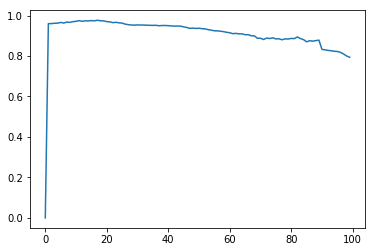

In [14]:
res = np.zeros(100)
for k in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for i in range(1,100):
        my_clf.setneigh(i)
        my_clf.fit(X_train, y_train)
        res[i] +=  my_clf.score(X_test, y_test)
s = pd.Series(res / 1000)
ax = s.plot()
print(np.argmax(res))

Задание 3

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=3)
my_clf = MyKNeighborsClassifier(n_neighbors=3)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 40 s, sys: 188 ms, total: 40.2 s
Wall time: 40.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 278 ms, sys: 244 ms, total: 522 ms
Wall time: 465 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 22s, sys: 28 ms, total: 1min 22s
Wall time: 1min 22s


array([3., 4., 6., 0., 8., 8., 4., 6., 2., 4., 6., 8., 3., 6., 9., 4., 1.,
       4., 5., 3., 9., 7., 4., 7., 6., 6., 3., 2., 1., 6., 2., 5., 6., 0.,
       2., 1., 6., 0., 4., 9., 6., 5., 6., 5., 7., 0., 6., 7., 2., 8., 8.,
       7., 5., 5., 9., 0., 6., 8., 5., 8., 6., 7., 0., 6., 4., 7., 6., 4.,
       9., 6., 5., 3., 5., 2., 9., 0., 8., 9., 7., 1., 2., 5., 0., 2., 9.,
       2., 1., 5., 8., 0., 1., 6., 3., 8., 4., 1., 1., 7., 1., 1., 5., 0.,
       9., 2., 2., 6., 1., 8., 1., 6., 2., 5., 3., 1., 6., 3., 0., 3., 7.,
       7., 3., 8., 9., 4., 3., 8., 7., 7., 8., 3., 6., 2., 0., 9., 3., 9.,
       2., 3., 1., 7., 8., 8., 5., 4., 4., 0., 3., 2., 7., 5., 0., 5., 5.,
       0., 9., 7., 2., 4., 7., 6., 5., 3., 4., 6., 5., 1., 1., 4., 2., 1.,
       9., 1., 5., 1., 8., 0., 7., 9., 3., 6., 0., 4., 0., 7., 0., 9., 9.,
       2., 4., 1., 3., 4., 9., 1., 9., 9., 8., 7., 6., 5., 8., 0., 7., 6.,
       0., 8., 0., 3., 7., 7., 9., 1., 7., 1., 8., 2., 3., 2., 7., 5., 2.,
       4., 1., 4., 5., 8.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 3.69 s, sys: 896 ms, total: 4.58 s
Wall time: 7 s


array([3., 4., 6., 0., 8., 8., 4., 6., 2., 4., 6., 8., 3., 6., 9., 4., 1.,
       4., 5., 3., 9., 7., 4., 7., 6., 6., 3., 2., 1., 6., 2., 5., 6., 0.,
       2., 1., 6., 0., 4., 9., 6., 5., 6., 5., 7., 0., 6., 7., 2., 8., 8.,
       7., 5., 5., 9., 0., 6., 8., 5., 8., 6., 7., 0., 6., 4., 7., 6., 4.,
       9., 6., 5., 3., 5., 2., 9., 0., 8., 9., 7., 1., 2., 5., 0., 2., 9.,
       2., 1., 5., 8., 0., 1., 6., 3., 8., 4., 1., 1., 7., 1., 1., 5., 0.,
       9., 2., 2., 6., 1., 8., 1., 6., 2., 5., 3., 1., 6., 3., 0., 3., 7.,
       7., 3., 8., 9., 4., 3., 8., 7., 7., 8., 3., 6., 2., 0., 9., 3., 9.,
       2., 3., 1., 7., 8., 8., 5., 9., 4., 0., 3., 2., 7., 5., 0., 5., 5.,
       0., 9., 7., 2., 4., 7., 6., 5., 3., 4., 6., 5., 1., 1., 4., 2., 1.,
       9., 1., 5., 1., 8., 0., 7., 9., 3., 6., 0., 4., 0., 7., 0., 9., 9.,
       2., 4., 1., 3., 4., 9., 1., 9., 9., 8., 7., 6., 5., 8., 0., 7., 6.,
       0., 8., 0., 3., 7., 7., 9., 1., 7., 1., 8., 2., 3., 2., 7., 5., 2.,
       4., 1., 4., 5., 8.

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 24s, sys: 36.1 ms, total: 1min 24s
Wall time: 1min 25s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
CPU times: user 3.92 s, sys: 800 ms, total: 4.72 s
Wall time: 5.28 s


In [24]:
clf.score(X_test, y_test)

0.9714285714285714

In [25]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 41.2 s, sys: 172 ms, total: 41.3 s
Wall time: 41.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 37.6 s, sys: 300 ms, total: 37.9 s
Wall time: 37.7 s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 21s, sys: 20.1 ms, total: 1min 21s
Wall time: 1min 21s


array([6., 7., 2., 4., 0., 7., 0., 7., 7., 9., 6., 3., 4., 7., 1., 0., 9.,
       8., 6., 3., 2., 9., 8., 6., 4., 7., 3., 3., 3., 4., 8., 3., 8., 3.,
       8., 5., 6., 8., 2., 4., 0., 1., 7., 1., 8., 4., 1., 3., 4., 3., 1.,
       2., 7., 0., 6., 2., 0., 2., 8., 9., 4., 8., 9., 0., 6., 6., 4., 4.,
       6., 0., 2., 0., 7., 4., 3., 8., 2., 8., 1., 5., 8., 1., 3., 4., 7.,
       3., 6., 1., 7., 6., 8., 3., 0., 2., 7., 6., 6., 4., 0., 6., 5., 1.,
       9., 7., 0., 0., 7., 2., 0., 5., 3., 6., 3., 0., 7., 0., 6., 0., 6.,
       0., 8., 1., 1., 6., 1., 7., 9., 3., 1., 2., 7., 4., 3., 0., 6., 2.,
       6., 5., 1., 7., 3., 0., 2., 9., 3., 1., 1., 2., 9., 5., 2., 5., 3.,
       2., 4., 1., 9., 1., 5., 0., 1., 7., 7., 4., 6., 0., 8., 2., 2., 0.,
       2., 9., 2., 0., 6., 5., 7., 1., 6., 5., 4., 2., 8., 1., 3., 1., 8.,
       0., 5., 6., 3., 4., 5., 7., 7., 2., 8., 4., 0., 9., 2., 4., 6., 9.,
       1., 2., 5., 9., 4., 6., 7., 2., 2., 0., 8., 6., 5., 1., 7., 2., 9.,
       8., 0., 2., 3., 2.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 8s, sys: 41 µs, total: 1min 8s
Wall time: 1min 8s


array([6., 7., 2., 4., 0., 7., 0., 7., 7., 9., 6., 3., 4., 7., 1., 0., 9.,
       8., 6., 3., 2., 9., 8., 6., 9., 7., 3., 3., 3., 4., 8., 3., 8., 3.,
       8., 5., 6., 8., 2., 4., 0., 1., 7., 1., 8., 4., 1., 3., 4., 3., 1.,
       2., 7., 0., 6., 2., 0., 2., 8., 9., 4., 8., 9., 0., 6., 6., 4., 4.,
       6., 0., 2., 0., 7., 4., 3., 8., 2., 8., 1., 5., 8., 1., 3., 4., 7.,
       3., 6., 1., 7., 6., 8., 3., 0., 2., 7., 6., 6., 4., 0., 6., 5., 1.,
       9., 7., 0., 0., 7., 2., 0., 5., 3., 6., 3., 0., 7., 0., 6., 0., 6.,
       0., 8., 1., 1., 6., 1., 7., 9., 3., 1., 2., 7., 4., 3., 0., 6., 2.,
       6., 5., 1., 7., 3., 0., 2., 9., 3., 1., 1., 2., 9., 5., 2., 5., 3.,
       2., 4., 1., 9., 1., 5., 0., 1., 7., 7., 4., 6., 0., 8., 2., 2., 0.,
       2., 9., 2., 0., 6., 6., 7., 1., 6., 5., 7., 2., 8., 1., 3., 1., 8.,
       0., 5., 6., 3., 4., 5., 7., 7., 2., 8., 9., 0., 9., 2., 4., 6., 9.,
       1., 2., 5., 9., 4., 6., 7., 2., 2., 0., 8., 6., 5., 1., 7., 2., 9.,
       8., 0., 2., 3., 2.

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 21s, sys: 12.1 ms, total: 1min 21s
Wall time: 1min 21s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
CPU times: user 1min 9s, sys: 12.1 ms, total: 1min 9s
Wall time: 1min 9s


In [34]:
clf.score(X_test, y_test)

0.97

In [35]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 5

In [36]:
# seaborn - улучшает внешний вид графиков matplolib 
# matplotlib - построение графков и диаграмм
# train_test_split -  разбивает данные на две выборки(тестовую и обучающую)
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler) изменяет значаение элеметов выборки так чтобы МО было 0, а std 1 
# ClassifierMixin - родительский класс классификаторов в scikit-learn
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin